In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv("data/googleplaystore.csv")

**Link**: [Google Play Store](https://www.kaggle.com/lava18/google-play-store-apps)

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

- We need to change the data type from each columns so we can explore the data easier.
- Some data is duplicated, we need to delete and just keep the first data. If we don't delete the duplicates, number install or review will higher for some app.
- I put some new column with name size note because i don't want to lose some data when I change size data types. If the row have size number, then the size note column equal to "fix", but if don't then size note column equal to "variance with device".
- I add new column for each genres and give 1 if that app contain the same genres. Because some app have more than 1 genre.
- Some data have missing value, we will deal with it later in "prepare the data" section.
- Most of apps in google play is free with content for everyone.
- Some columns have outlier, we will deal later in "prepare the data" section

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df["Reviews"] = df["Reviews"].map(lambda x: float(x) if x.isnumeric() else float(x[:-1]))
df["Size_Note"] = df["Size"].map(lambda x: "Fix" if x[-1] == "k" else "Fix" if x[-1] == "M" else "Fix" if x[-1] == "+" else x)
df["Size"] = df["Size"].map(lambda x: float(x[:-1]) if x[-1] == "k" else float(x[:-1]) * 1000 if x[-1] == "M" else 1 if x[-1] == "+" else np.nan)
df["Installs"] = df["Installs"].map(lambda x: float(x[:-1].replace(",", "")) if x[-1] == "+" else 0)
df["Type"] = df["Type"].map(lambda x: "Free" if x == "0" else x)
df["Price"] = df["Price"].map(lambda x: float(x[1:]) if x[0] == "$" else 0)
df = df.drop(index = 10472)
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [6]:
df.drop_duplicates(subset = "App", inplace = True)

In [7]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20395.289315,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21827.542435,5.375828e+07,16.852152
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4600.000000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12000.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28000.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [8]:
df.describe(include = "object")

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver,Size_Note
count,9659,9659,9658,9659,9659,9651,9657,9659
unique,9659,33,2,6,118,2817,33,2
top,N Launcher Pro - Nougat 7.0,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up,Fix
freq,1,1832,8902,7903,826,1055,2202,8432


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_Note            0
dtype: int64

In [10]:
genres = df["Genres"].tolist()
genres = [i.split(";") for i in genres]
gen_list = []
for gen in genres:
    for i in gen:
        if i not in gen_list:
            gen_list.append(i)
gen_list = sorted(gen_list)

In [11]:
for gen in gen_list:
    df[gen] = df["Genres"].map(lambda x: 1 if gen in x else 0)

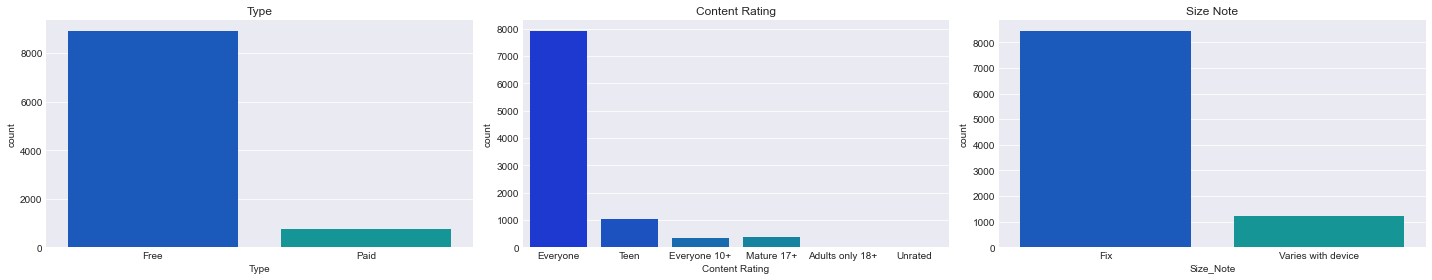

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))
sns.countplot(df["Type"], palette = "winter", ax = ax[0]); ax[0].set_title("Type")
sns.countplot(df["Content Rating"], palette = "winter", ax = ax[1]); ax[1].set_title("Content Rating")
sns.countplot(df["Size_Note"], palette = "winter", ax = ax[2]); ax[2].set_title("Size Note")
plt.tight_layout()
plt.show()

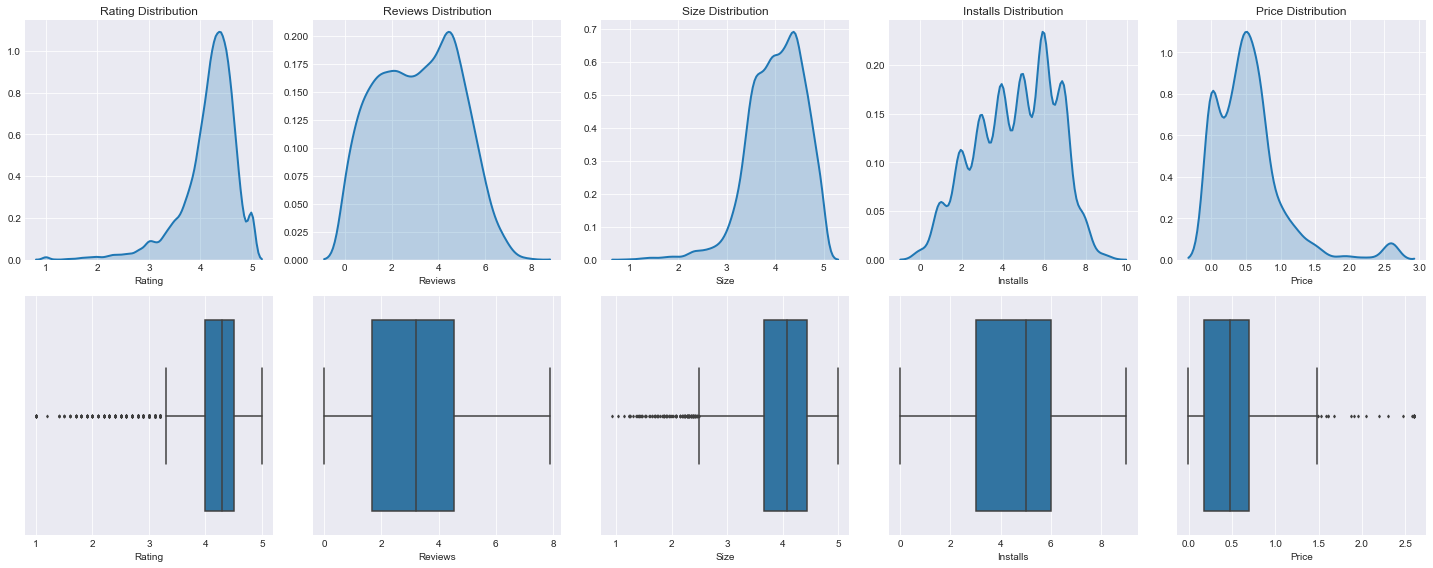

In [13]:
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
columns = ["Rating", "Reviews", "Size", "Installs", "Price"]
for col in range(len(columns)):
    if df[columns[col]].skew() > 1:
        sns.distplot(np.log10(df[df[columns[col]] > 0][columns[col]]), hist = False, kde_kws = {"shade": True, "linewidth": 2}, ax = ax[0, col])
        sns.boxplot(np.log10(df[df[columns[col]] > 0][columns[col]]), fliersize = 2, ax = ax[1, col])
    else:
        sns.distplot(df[columns[col]], hist = False, kde_kws = {"shade": True, "linewidth": 2}, ax = ax[0, col])
        sns.boxplot(df[columns[col]], fliersize = 2, ax = ax[1, col])
    ax[0, col].set_title(columns[col] + " Distribution")
plt.tight_layout()
plt.show()

Key Take Away:
- By category, game have the highest number install than other categories.
- By genres, communication have the highest number install than other categories.
- Average rating = 4.17

In [14]:
data_graph = pd.DataFrame()
for gen in gen_list:
    data_graph[gen] = df.apply(lambda x: x["Installs"] * x[gen], axis = 1)

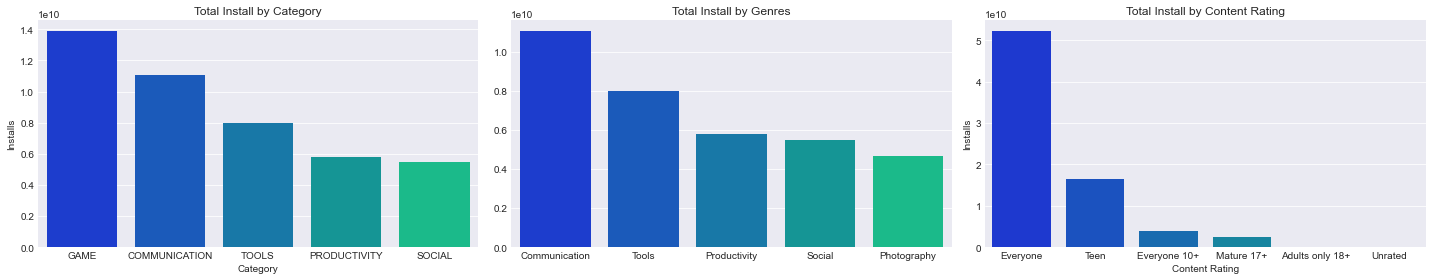

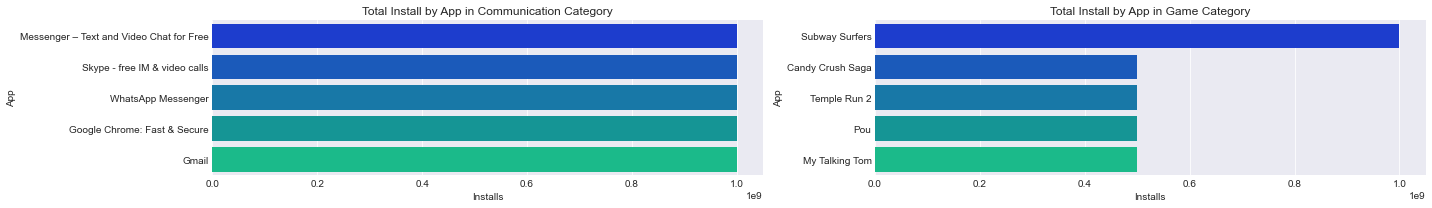

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (20, 4))
sns.barplot(x = "Category", y = "Installs", data = df.groupby("Category").sum().reset_index().sort_values("Installs", ascending = False).head(5),
            palette = "winter", ax = ax[0])
data_graph = data_graph.sum().sort_values(ascending = False).head(5)
sns.barplot(x = data_graph.index, y = data_graph,
            palette = "winter", ax = ax[1])
sns.barplot(x = "Content Rating", y = "Installs", data = df.groupby("Content Rating").sum().reset_index().sort_values("Installs", ascending = False),
            palette = "winter", ax = ax[2])
ax[0].set_title("Total Install by Category")
ax[1].set_title("Total Install by Genres")
ax[2].set_title("Total Install by Content Rating")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (20, 3))
sns.barplot(x = "Installs", y = "App", data = df[df["Category"] == "COMMUNICATION"].sort_values("Installs", ascending = False).head(5),
            palette = "winter", ax = ax[0])
sns.barplot(x = "Installs", y = "App", data = df[df["Category"] == "GAME"].sort_values("Installs", ascending = False).head(5),
            palette = "winter", ax = ax[1])
ax[0].set_title("Total Install by App in Communication Category")
ax[1].set_title("Total Install by App in Game Category")
plt.tight_layout()
plt.show()

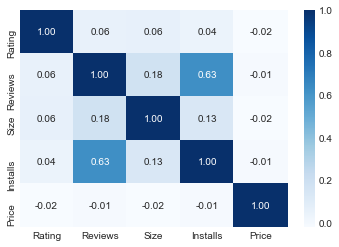

In [16]:
columns = ["Rating", "Reviews", "Size", "Installs", "Price"]
sns.heatmap(df[columns].corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

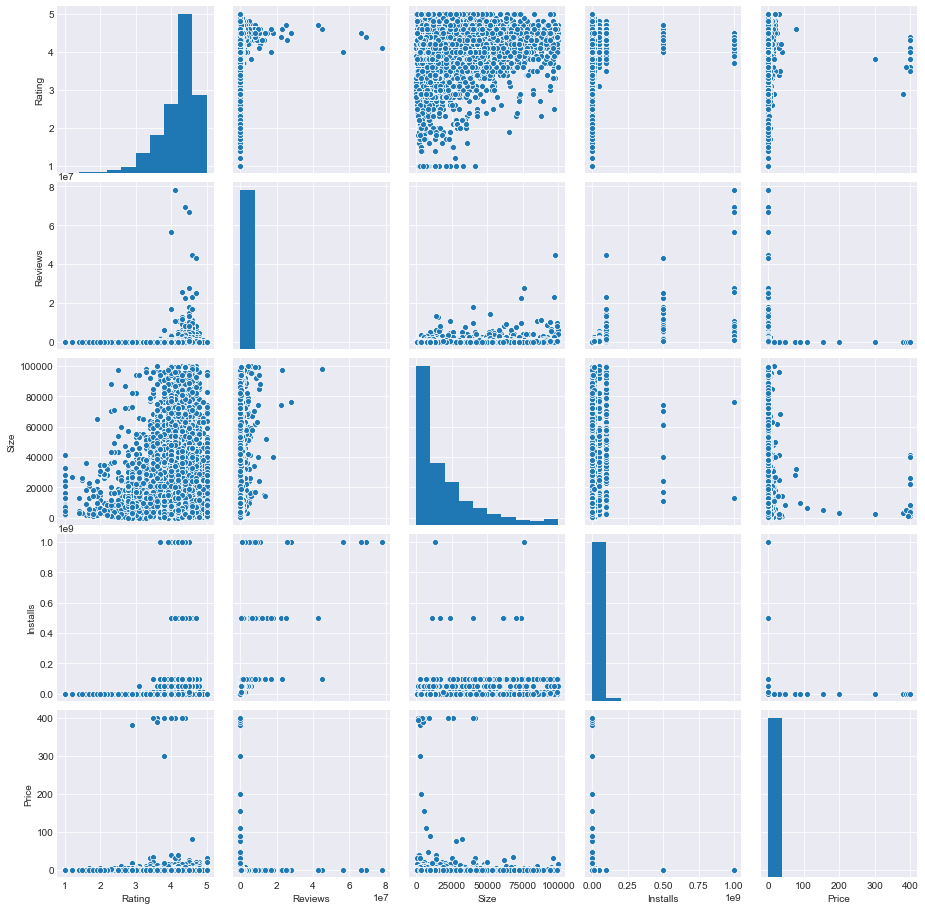

In [17]:
columns = ["Rating", "Reviews", "Size", "Installs", "Price"]
sns.pairplot(df[columns])
plt.show()

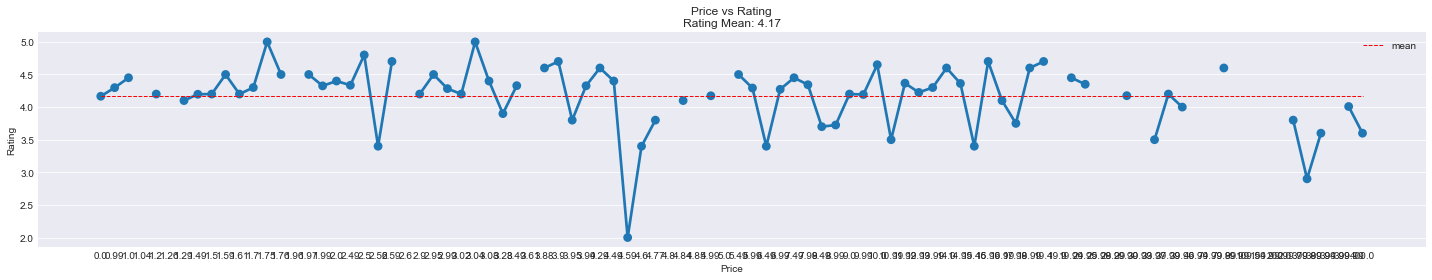

In [18]:
plt.figure(figsize = (20, 4))
sns.pointplot(x = "Price", y = "Rating", data = df, ci = 0)
plt.plot(range(0, 92), [df["Rating"].mean()] * len(range(0, 92)), ls = "--", lw = 1, color = "red", label = "mean")
plt.legend()
plt.title("Price vs Rating\nRating Mean: " + str(round(df["Rating"].mean(), 2)))
plt.tight_layout()
plt.show()

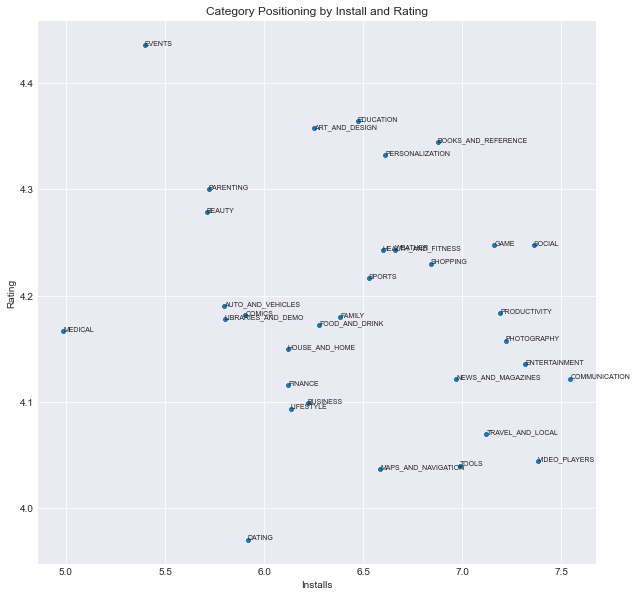

In [19]:
plt.figure(figsize = (10, 10))
data_graph = df.groupby("Category").mean().reset_index()
sns.scatterplot(x = np.log10(data_graph["Installs"]), y = data_graph["Rating"])
for i, txt in enumerate(data_graph["Category"].unique()):
        plt.annotate(txt, (np.log10(data_graph["Installs"].iloc[i]), data_graph["Rating"].iloc[i]), size = 7)
plt.title("Category Positioning by Install and Rating")
plt.show()

---
## **2. PREPARE THE DATA**
---

**DATA CLEANING**

- Delete column with lower missing value
- Fill missing value with average value from that columns

In [20]:
df = df[df["Current Ver"].notnull()]
df = df[df["Android Ver"].notnull()]
df = df[df["Type"].notnull()]

In [21]:
df["Rating"].fillna(df["Rating"].mean(), inplace = True)
df["Size"].fillna(df["Size"].mean(), inplace = True)

In [22]:
columns = ["Reviews", "Rating", "Size", "Installs"]
for col in columns:
    p25 = np.percentile(np.log10(df[(df[col] > 0) & (df[col].notnull())][col]), 25)
    p75 = np.percentile(np.log10(df[(df[col] > 0) & (df[col].notnull())][col]), 75)
    iqr = p75 - p25
    upper = p75 + iqr * 3
    lower = p25 - iqr * 3
    df = df[(np.log10(df[col]) <= upper) & (np.log10(df[col]) >= lower)]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


**FEATURE SELECTION**

- Delete App because this columns doesn't have any information
- Delete genres because we already change it into columns
- Delete Size Note because it only help us in exploratory data analysis, instead we will use size columns.
- Delete Last updated, Current Ver, and Android Ver.

In [23]:
df = df.drop(["App", "Genres", "Size_Note", "Last Updated", "Current Ver", "Android Ver"], axis = 1)

**FEATURE ENGINEERING**

In [24]:
columns = ["Category", "Type", "Content Rating"]
for col in columns:
    df = pd.concat([df, pd.get_dummies(df[col], prefix = col, drop_first = True)], axis = 1)
    df = df.drop(col, axis = 1)

**FEATURE SCALING**

- We standardize data using min max scaler, we transform data into min 0 and max 1
- After we standardize the data, we transform into 2 columns so we can visulize the data and create the clustering. We will use PCA to create 2 columns.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components = 2, random_state = 0)
df = pd.DataFrame(pca.fit_transform(df), columns = ["pc1", "pc2"])

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

I will take 1000 data to make clustering because it's heavy to do if I use all data.

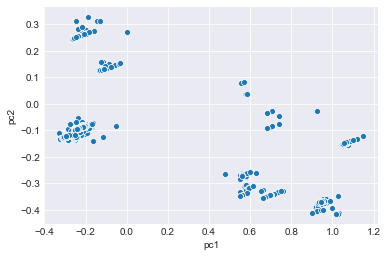

In [30]:
sns.scatterplot(x = "pc1", y = "pc2", data = df[:1000])
plt.show()

In [31]:
df = df[:1000].values

In [32]:
data = df.copy()

We will create clustering using defaul parameter and check which algorithm have the best performance.
- We will create clustering using default parameter.
- We will find the best parameter for each algorithm.
- We will creare clustering using the parameter that we get for each algorithm.

In [34]:
# Algorithm
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch

# Model Selection
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Graph
from scipy.cluster.hierarchy import dendrogram

In [41]:
algorithm = {
    "KMeans": KMeans(),
    "Affinity Propagation": AffinityPropagation(damping = 0.9, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False),
    "Spectral Clustering": SpectralClustering(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "DBSCAN": DBSCAN(),
    "OPTICS": OPTICS(),
    "Birch": Birch(threshold = 0.2),
}

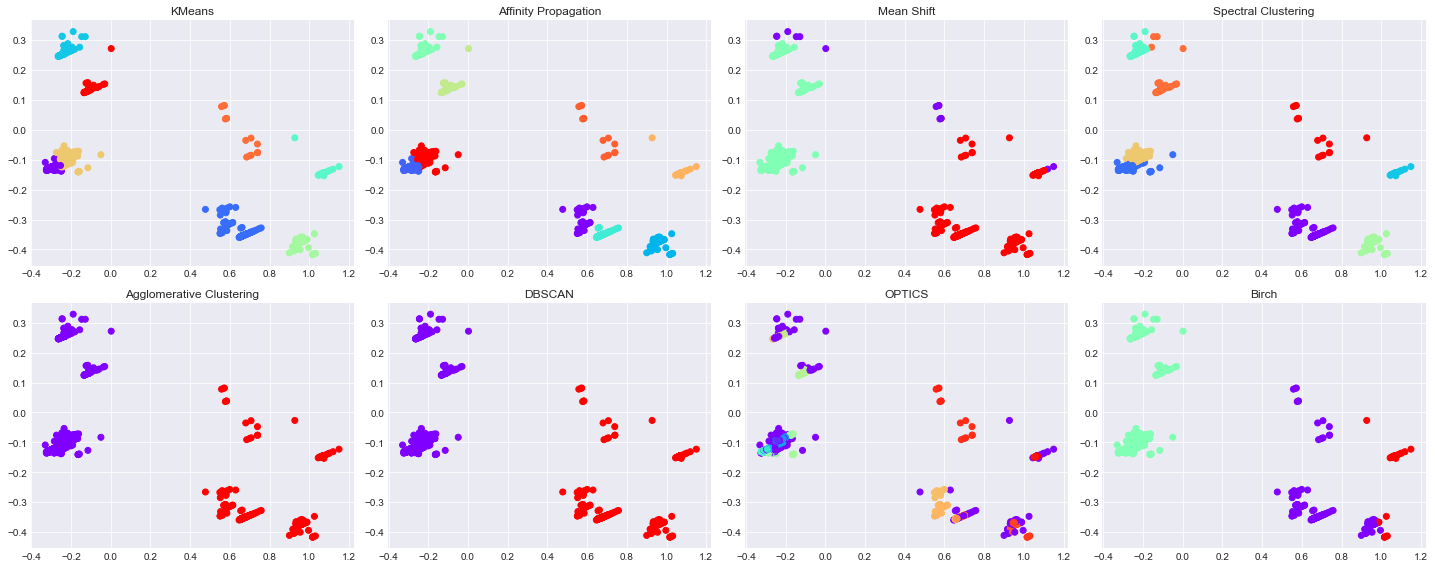

In [42]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()

In [43]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [44]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.685356,0.676072,0.745270,0.663440,0.839114,0.839114,0.001227,0.788218
Calinski,31936.513765,38079.208611,3804.809906,27650.514932,8019.572243,8019.572243,17.700274,5560.267627
Davies,0.379304,0.402103,0.987942,0.431171,0.298791,0.298791,1.271185,0.376333


**KMEANS**

In [45]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = KMeans(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
    inertia.append(model.inertia_)

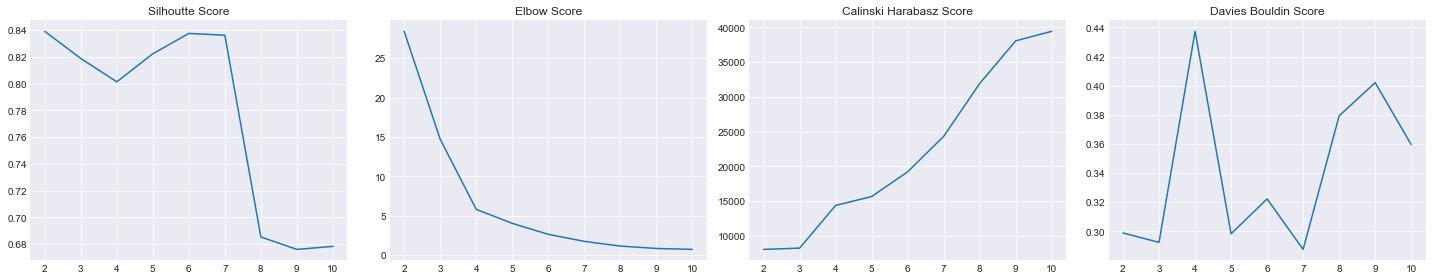

In [46]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
sns.lineplot(x = range(2, 11), y = inertia, ax = ax[1]); ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AFFINITY PROPAGATION**

In [47]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.8, 0.9, 10)):
    model = AffinityPropagation(damping = clu, random_state = 0)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))

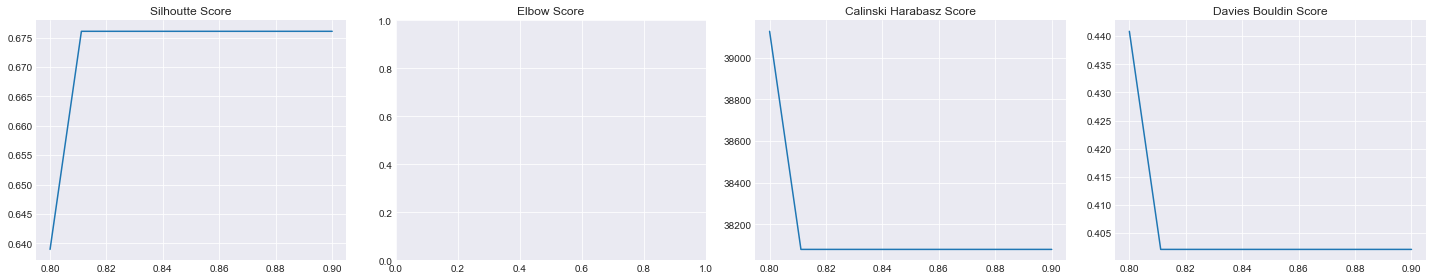

In [48]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**MEAN SHIFT**

In [49]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.5, 0.9, 10)):
    model = MeanShift(cluster_all = False, bandwidth = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

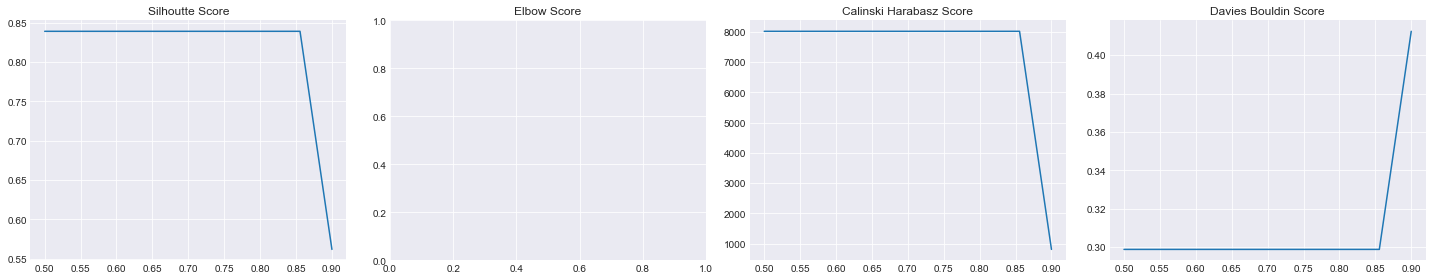

In [50]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**SPECTRAL CLUSTERING**

In [51]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = SpectralClustering(n_clusters = clu, n_neighbors = clu * 2)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

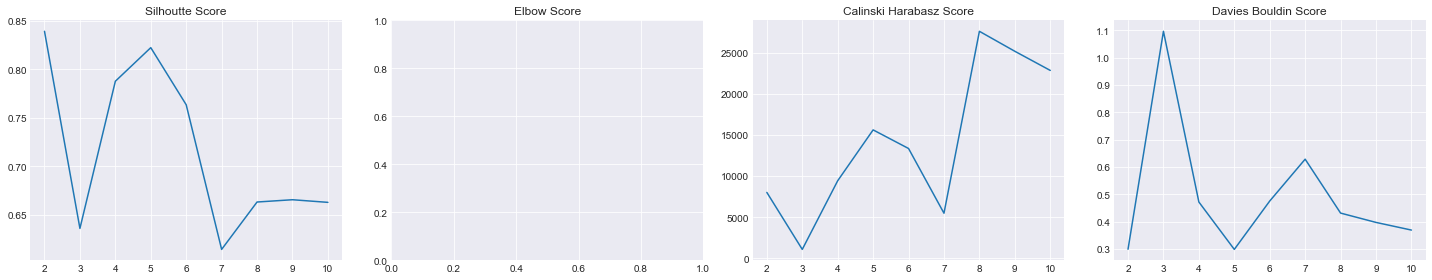

In [52]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AGGLOMERATIVE CLUSTERING**

In [53]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = AgglomerativeClustering(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

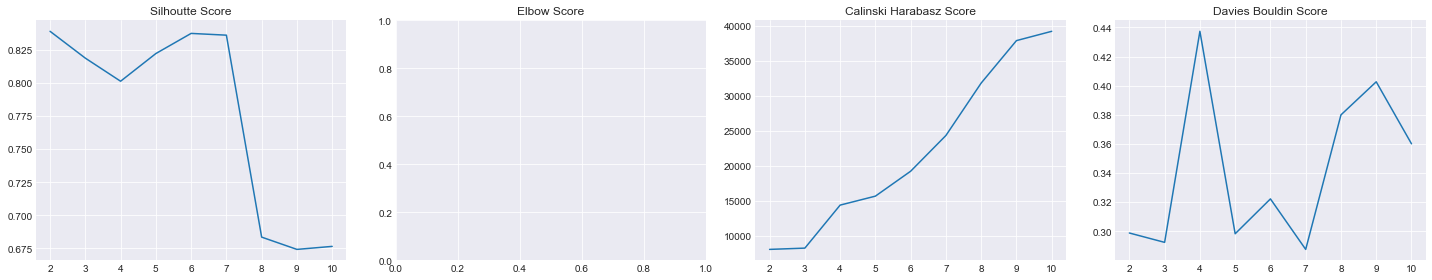

In [54]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

In [55]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

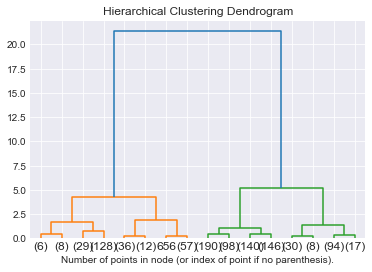

In [58]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**DBSCAN**

In [59]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.1, 0.5, 6)):
    model = DBSCAN(eps = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

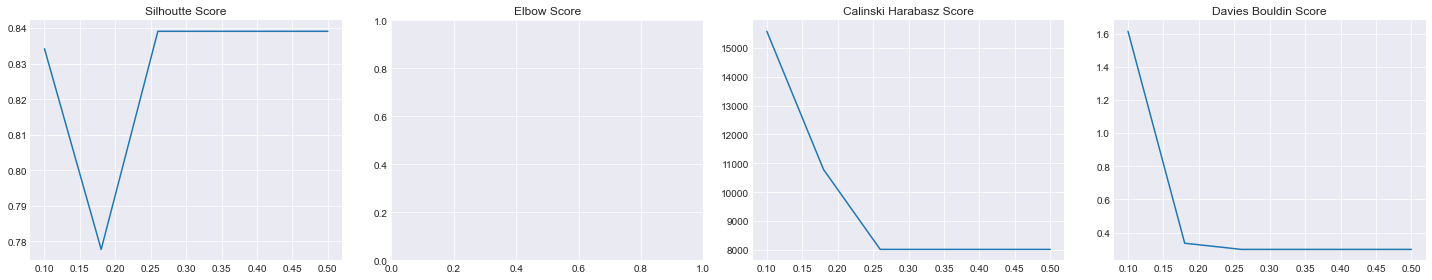

In [60]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**OPTICS**

In [61]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(1, 10, 10)):
    model = OPTICS(eps = clu, leaf_size = clu * 10)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

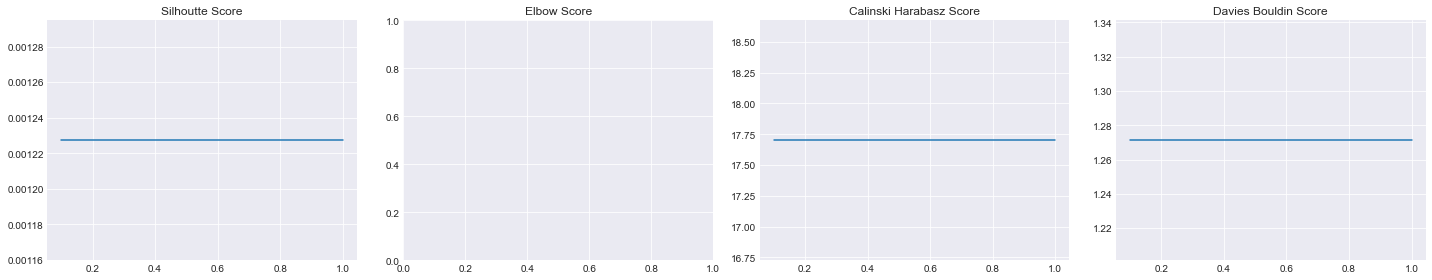

In [62]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**BIRCH**

In [65]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = Birch(n_clusters = clu, threshold = 0.06)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

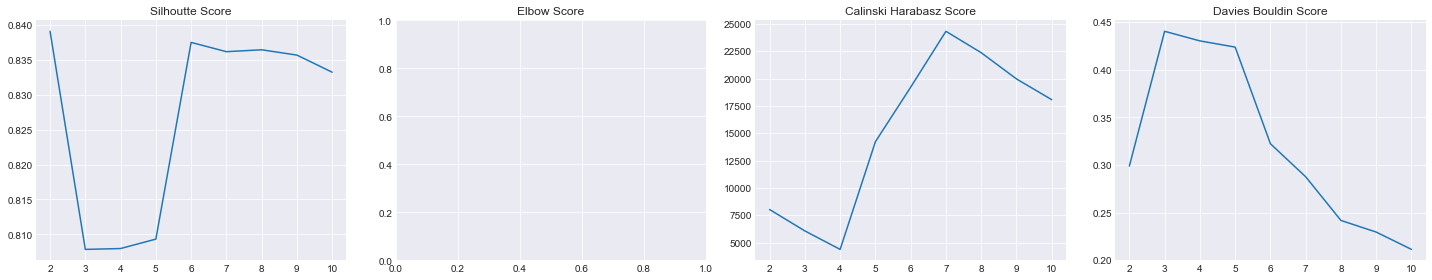

In [66]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**FINAL CHECK**

In [69]:
algorithm = {
    "KMeans": KMeans(n_clusters = 6),
    "Affinity Propagation": AffinityPropagation(damping = 0.81, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False, bandwidth = 0.85),
    "Spectral Clustering": SpectralClustering(n_clusters = 5, n_neighbors = 10),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters = 6),
    "DBSCAN": DBSCAN(eps = 0.25),
    "OPTICS": OPTICS(),
    "Birch": Birch(n_clusters = 6, threshold = 0.06)
}

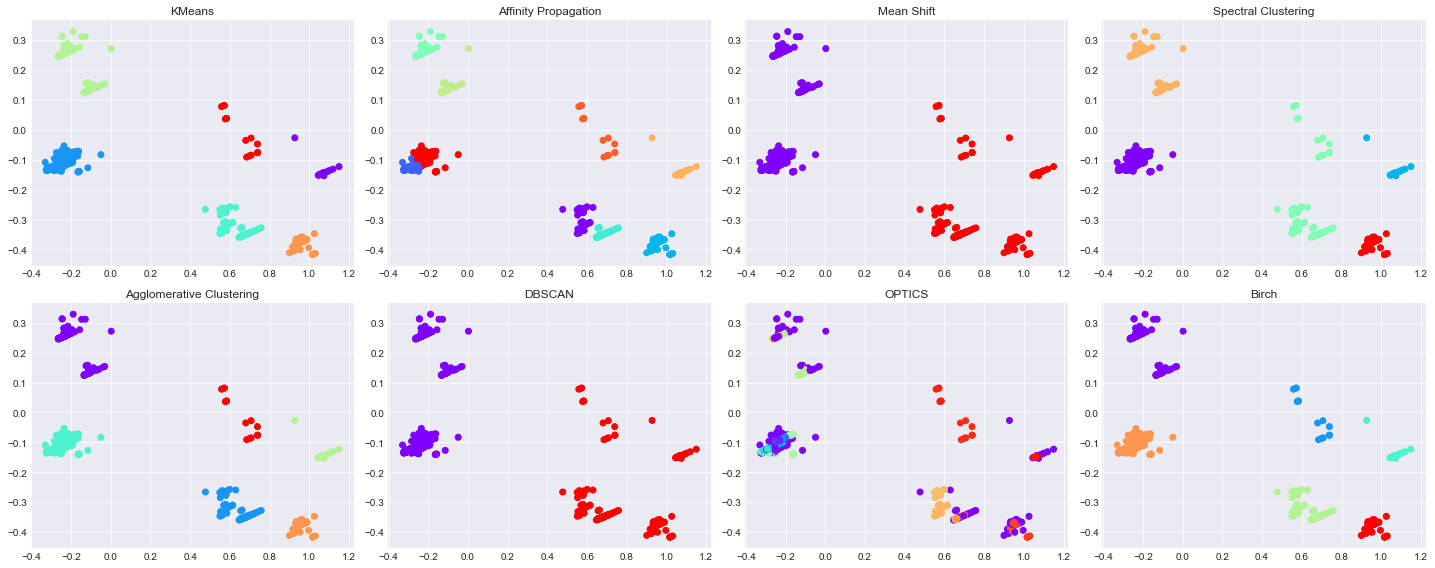

In [70]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_clustering_mall_cust.png')

In [71]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [72]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.837524,0.676072,0.839114,0.822290,0.837524,0.839114,0.001227,0.837524
Calinski,19203.892094,38079.208611,8019.572243,15637.855619,19203.892094,8019.572243,17.700274,19203.892094
Davies,0.322223,0.402103,0.298791,0.298273,0.322223,0.298791,1.271185,0.322223
